In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
from torchwi import Tomo2d

In [3]:
nx=320
ny=50
h=0.1
# marm
#h=0.0288 
# bp
#h=0.21075 
# overthrust
#h=0.0626 
shotskip=2

In [4]:
shape = (nx,ny)
meter_to_km=0.001

nshot = 200

In [5]:
sxs = (104 + np.arange(nshot))*h
sy = 0.
ry = 0.

rx = np.zeros((nshot,2),dtype=np.int32)

In [6]:
for ishot in range(nshot):
    rx[ishot,0] = 2 + ishot
    rx[ishot,1] = rx[ishot,0] + 100

print("nshot=%d, sy=%s, ry=%s"%(nshot,sy,ry))

nshot=200, sy=0.0, ry=0.0


In [7]:
rcv_mask = np.zeros((nshot,nx),dtype=bool)

for ishot in range(nshot):
    ir0 = rx[ishot,0]
    ir1 = rx[ishot,1]
    rcv_mask[ishot,ir0:ir1] = True

In [8]:
tomo = Tomo2d(nx,ny,h)
freq = 0.05
vmean = 3.0

In [9]:
alpha = 2*np.pi/(20*h)*vmean
omega = 2.*np.pi*freq - alpha * 1.0j

print("omega = ",omega)

omega =  (0.3141592653589793-9.42477796076938j)


In [10]:
#vel = np.fromfile("./marm_intp_water.bin",dtype=np.float32)
#vel = np.fromfile("./bp_intp_water.bin",dtype=np.float32)
vel = np.fromfile("./overthrust_intp_water.bin",dtype=np.float32)
vel.shape = (nx,ny)

tomo.factorize(omega, torch.from_numpy(vel))
ttime = tomo.forward(torch.from_numpy(sxs), sy, ry)

t = ttime.detach().numpy().astype(np.float32)
t = t*rcv_mask

#t.tofile("ttime_marm_water.bin")
#t.tofile("ttime_bp_water.bin")
t.tofile("ttime_overthrust_water.bin")

In [11]:
#time = np.fromfile("./ttime_marm_water.bin",dtype=np.float32)
#time = np.fromfile("./ttime_bp_water.bin",dtype=np.float32)
time = np.fromfile("./ttime_overthrust_water.bin",dtype=np.float32)
time.shape = (nshot,nx)

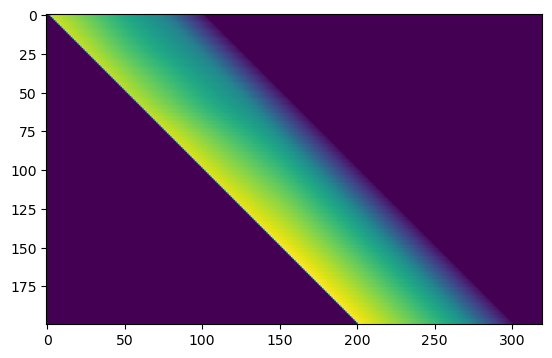

In [12]:
plt.imshow(time)